In [2]:
%pip install matplotlib requests parsel pandas prophet jinja2 notebook ipykernel

'exec(%matplotlib inline)'

import pandas as pd
import numpy
import matplotlib.pyplot as plt

**Key Project Question**:
- What is the avarage losses per day per each group? ✅
- How many personnel losses will be in a one year projection? ✅

## Exploration

In [3]:
# Import JSON  data
# Convert date column to pandas readable format

russo_loses_data = pd.read_json('../data/russo-ukraine-war-casualties.json', orient='records', convert_dates=True, keep_default_dates=False)
russo_loses_data

,date,tanks,armored_vehicle,planes,helicopters,cannons,mlrs_buk,mlrs_grad,mlrs,anti_air,uav,cruise_missiles,ships,cars_cisterns,special_equpment,personnel
0,28.02.2022,191,816,29,29,74.0,1.0,21.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,5300
1,27.02.2022,150,706,27,26,50.0,1.0,4.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,4500
2,26.02.2022,100,540,16,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000
3,25.02.2022,100,516,10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800
4,24.02.2022,30,130,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,05.10.2022,2435,5038,266,232,1414.0,NaN,NaN,341.0,177.0,1032.0,246.0,15.0,132.0,132.0,61000
220,04.10.2022,2424,5018,266,228,1407.0,NaN,NaN,340.0,177.0,1028.0,246.0,15.0,131.0,131.0,60800
221,03.10.2022,2380,4991,265,228,1405.0,NaN,NaN,NaN,176.0,1026.0,246.0,15.0,131.0,131.0,60430
222,02.10.2022,2377,4975,264,227,1405.0,NaN,NaN,337.0,176.0,1015.0,246.0,15.0,131.0,131.0,60110


In [4]:
# describe data

russo_loses_data.describe()

,tanks,armored_vehicle,planes,helicopters,cannons,mlrs_buk,mlrs_grad,mlrs,anti_air,uav,cruise_missiles,ships,cars_cisterns,special_equpment,personnel
count,224.000000,224.000000,224.000000,224.000000,221.000000,3.0,4.000000,207.000000,219.000000,221.000000,158.000000,221.000000,204.000000,204.000000,224.000000
mean,1364.272321,3198.044643,191.241071,166.491071,719.656109,1.0,22.250000,209.198068,101.415525,516.669683,163.626582,11.669683,65.083333,65.083333,32752.035714
std,615.671846,1197.287797,60.463790,45.719558,365.018841,0.0,14.750706,80.958184,41.993511,318.804192,47.131809,4.270878,34.475777,34.475777,14152.138048
min,30.000000,130.000000,7.000000,6.000000,50.000000,1.0,4.000000,42.000000,7.000000,2.000000,84.000000,2.000000,10.000000,10.000000,800.000000
25%,825.500000,2110.250000,171.750000,150.750000,403.000000,1.0,16.750000,148.000000,69.000000,182.000000,125.000000,8.000000,38.000000,38.000000,20975.000000
50%,1444.500000,3536.500000,213.000000,179.000000,734.000000,1.0,22.500000,235.000000,98.000000,593.000000,166.500000,13.000000,60.000000,60.000000,32850.000000
75%,1835.500000,4089.500000,232.000000,193.000000,974.000000,1.0,28.000000,261.000000,135.000000,772.000000,196.000000,15.000000,92.000000,92.000000,42850.000000
max,2435.000000,5038.000000,266.000000,232.000000,1414.000000,1.0,40.000000,341.000000,177.000000,1032.000000,246.000000,15.000000,132.000000,132.000000,61000.000000


In [5]:
# additional info about the data

russo_loses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              224 non-null    object 
 1   tanks             224 non-null    int64  
 2   armored_vehicle   224 non-null    int64  
 3   planes            224 non-null    int64  
 4   helicopters       224 non-null    int64  
 5   cannons           221 non-null    float64
 6   mlrs_buk          3 non-null      float64
 7   mlrs_grad         4 non-null      float64
 8   mlrs              207 non-null    float64
 9   anti_air          219 non-null    float64
 10  uav               221 non-null    float64
 11  cruise_missiles   158 non-null    float64
 12  ships             221 non-null    float64
 13  cars_cisterns     204 non-null    float64
 14  special_equpment  204 non-null    float64
 15  personnel         224 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory u

In [6]:
# show number of NA values

df_russo_loses_data = pd.DataFrame(data=russo_loses_data)
df_russo_loses_data.isna().sum()

date                  0
tanks                 0
armored_vehicle       0
planes                0
helicopters           0
cannons               3
mlrs_buk            221
mlrs_grad           220
mlrs                 17
anti_air              5
uav                   3
cruise_missiles      66
ships                 3
cars_cisterns        20
special_equpment     20
personnel             0
dtype: int64

## Filling NaN values

Since the provided dataset is made by me, NaN values are [not missing at random](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/).

The reason is that on some days there were no reports to military general staff of Ukraine about the occupiers elimination.

In [7]:
df_russo_loses_data = pd.DataFrame(data=russo_loses_data)
df_subset = df_russo_loses_data

na_columns = ["cannons", "mlrs_buk", "mlrs_grad", "mlrs", "anti_air", "uav", "cruise_missiles", "ships", "cars_cisterns", "special_equpment"]

df_subset.loc[:, na_columns] = df_subset[na_columns].fillna(0)
df_subset.isna().sum()

date                0
tanks               0
armored_vehicle     0
planes              0
helicopters         0
cannons             0
mlrs_buk            0
mlrs_grad           0
mlrs                0
anti_air            0
uav                 0
cruise_missiles     0
ships               0
cars_cisterns       0
special_equpment    0
personnel           0
dtype: int64

## ~~Transforming~~ Standardizing data

In [8]:
# convert columns with float64 -> int data type

df_subset = df_subset.astype({
    'cannons': 'int',
    'mlrs_buk': 'int',
    'mlrs_grad': 'int',
    'mlrs': 'int',
    'anti_air': 'int',
    'uav': 'int',
    'cruise_missiles': 'int',
    'ships': 'int',
    'cars_cisterns': 'int',
    'special_equpment': 'int',
})

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              224 non-null    object
 1   tanks             224 non-null    int64 
 2   armored_vehicle   224 non-null    int64 
 3   planes            224 non-null    int64 
 4   helicopters       224 non-null    int64 
 5   cannons           224 non-null    int64 
 6   mlrs_buk          224 non-null    int64 
 7   mlrs_grad         224 non-null    int64 
 8   mlrs              224 non-null    int64 
 9   anti_air          224 non-null    int64 
 10  uav               224 non-null    int64 
 11  cruise_missiles   224 non-null    int64 
 12  ships             224 non-null    int64 
 13  cars_cisterns     224 non-null    int64 
 14  special_equpment  224 non-null    int64 
 15  personnel         224 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 28.1+ KB


## Sorting data by 'date' column

In [9]:
# sort DataFrame dates: from 24-02 to 05-10

df_subset['date'] = pd.to_datetime(df_subset['date'], errors='coerce', dayfirst=True)

df_subset = df_subset.sort_values(by='date')
df_subset = df_subset.reset_index()
del df_subset['index']

df_subset.tail()

,date,tanks,armored_vehicle,planes,helicopters,cannons,mlrs_buk,mlrs_grad,mlrs,anti_air,uav,cruise_missiles,ships,cars_cisterns,special_equpment,personnel
219,2022-10-01,2354,4949,264,226,1397,0,0,336,176,1009,246,15,131,131,59610
220,2022-10-02,2377,4975,264,227,1405,0,0,337,176,1015,246,15,131,131,60110
221,2022-10-03,2380,4991,265,228,1405,0,0,0,176,1026,246,15,131,131,60430
222,2022-10-04,2424,5018,266,228,1407,0,0,340,177,1028,246,15,131,131,60800
223,2022-10-05,2435,5038,266,232,1414,0,0,341,177,1032,246,15,132,132,61000


# Visualization

### Question: What is the avarage losses per each group?

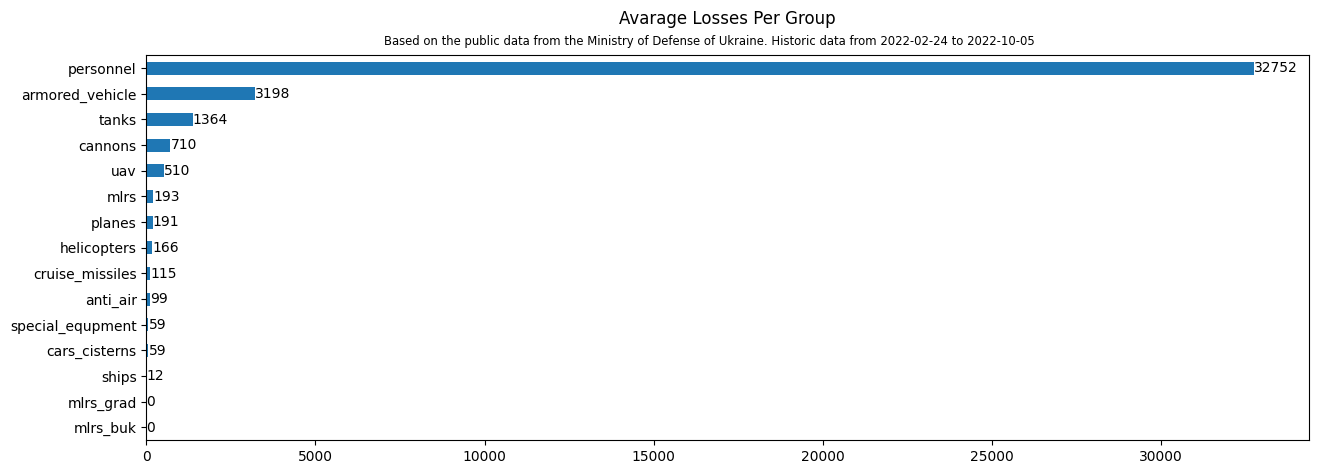

In [195]:
# barh plot of mean value for each group

bar_plot_columns = ['tanks', 'armored_vehicle', 'planes', 'helicopters', 'cannons',
       'mlrs_buk', 'mlrs_grad', 'mlrs', 'anti_air', 'uav', 'cruise_missiles',
       'ships', 'cars_cisterns', 'special_equpment', 'personnel']

# create a sub dataframe
# calculate mean value of each group and round it to the nearest int and then convert float64 result to int, and sort values
avarage_losses_df = df_subset[bar_plot_columns].mean().round(0).astype(int).sort_values(ascending=True)

avarage_losses_df.plot(kind='barh')

plt.title("Avarage Losses Per Group", y=1.06)
plt.suptitle('Based on the public data from the Ministry of Defense of Ukraine. Historic data from 2022-02-24 to 2022-10-05', fontsize='small', y=0.92)
ax = avarage_losses_df.plot(kind='barh', figsize=(15,5))
ax.bar_label(ax.containers[0]) # bar annotation
plt.show()


### Question: Minimum loses per each month?

In [213]:
df_subset['date'] = pd.to_datetime(df_subset['date'])

df_subset.groupby(pd.Grouper(key='date', freq='M')).min().style.set_caption('Minimum Loses Per Month: 2022-02-24 to 2022-10-05').background_gradient(cmap='Reds')

,tanks,armored_vehicle,planes,helicopters,cannons,mlrs_buk,mlrs_grad,mlrs,anti_air,uav,cruise_missiles,ships,cars_cisterns,special_equpment,personnel
date,,,,,,,,,,,,,,,
2022-02-28 00:00:00,30,130,7,6,0,0,0,0,0,0,0,0,0,0,800
2022-03-31 00:00:00,198,846,29,29,77,0,0,0,7,3,0,2,0,0,5710
2022-04-30 00:00:00,625,1751,143,131,316,0,0,0,54,85,0,7,24,24,17700
2022-05-31 00:00:00,1026,2471,192,155,451,0,0,0,80,245,84,8,32,32,23500
2022-06-30 00:00:00,1361,3343,208,175,659,0,0,0,94,519,120,13,49,49,30700
2022-07-31 00:00:00,1577,3736,217,186,796,0,0,0,105,645,143,15,61,61,35750
2022-08-31 00:00:00,1768,4011,223,190,932,0,0,259,117,736,174,15,82,82,41030
2022-09-30 00:00:00,1997,4345,234,205,1115,0,0,287,153,851,196,15,104,104,48350
2022-10-31 00:00:00,2354,4949,264,226,1397,0,0,0,176,1009,246,15,131,131,59610


### Question: Maximum loses per month?

In [214]:
df_subset['date'] = pd.to_datetime(df_subset['date'])
df_subset.groupby(pd.Grouper(key='date', freq='M')).max().style.set_caption('Maximum Loses Per Month: 2022-02-24 to 2022-10-05').background_gradient(cmap='Reds')

,tanks,armored_vehicle,planes,helicopters,cannons,mlrs_buk,mlrs_grad,mlrs,anti_air,uav,cruise_missiles,ships,cars_cisterns,special_equpment,personnel
date,,,,,,,,,,,,,,,
2022-02-28 00:00:00,191,816,29,29,74,1,21,0,0,3,0,2,0,0,5300
2022-03-31 00:00:00,614,1735,135,131,311,1,40,96,54,83,0,7,22,22,17500
2022-04-30 00:00:00,1008,2445,190,155,436,0,0,151,77,232,0,8,32,32,23200
2022-05-31 00:00:00,1358,3302,208,174,649,0,0,207,93,515,120,13,48,48,30500
2022-06-30 00:00:00,1573,3726,217,185,790,0,0,246,104,641,143,14,61,61,35600
2022-07-31 00:00:00,1763,4004,223,190,916,0,0,259,117,735,174,15,80,80,40830
2022-08-31 00:00:00,1974,4312,234,204,1091,0,0,285,152,849,196,15,103,103,47900
2022-09-30 00:00:00,2338,4932,264,225,1391,0,0,333,176,1003,246,15,131,131,59080
2022-10-31 00:00:00,2435,5038,266,232,1414,0,0,341,177,1032,246,15,132,132,61000


## Predictions

### Question: How many personnel losses will be in a one year projection?

In [198]:
from prophet import Prophet

# subset of date and personnel data
# renamed columns for Prophet to understand

personnel_losses_subset = df_subset[['date', 'personnel']]
personnel_losses_subset.rename(columns={'date': 'ds', 'personnel': 'y'}, inplace=True)

m = Prophet()
m.fit(personnel_losses_subset)

# prediction for the next year 
future_personnel_losses = m.make_future_dataframe(periods=365)
future_personnel_losses.tail()

/tmp/ipykernel_1091/4173136150.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds
584,2023-10-01
585,2023-10-02
586,2023-10-03
587,2023-10-04
588,2023-10-05


In [199]:
personnel_loses_forecast = m.predict(future_personnel_losses)
personnel_loses_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
584,2023-10-01,188708.140648,78795.102622,301047.790475
585,2023-10-02,189027.882554,78365.571462,301950.852864
586,2023-10-03,189417.624446,78122.024505,302742.808862
587,2023-10-04,189723.616317,77898.605202,303623.576419
588,2023-10-05,190096.711520,77527.254817,304065.596426


### Visualizing Predictions

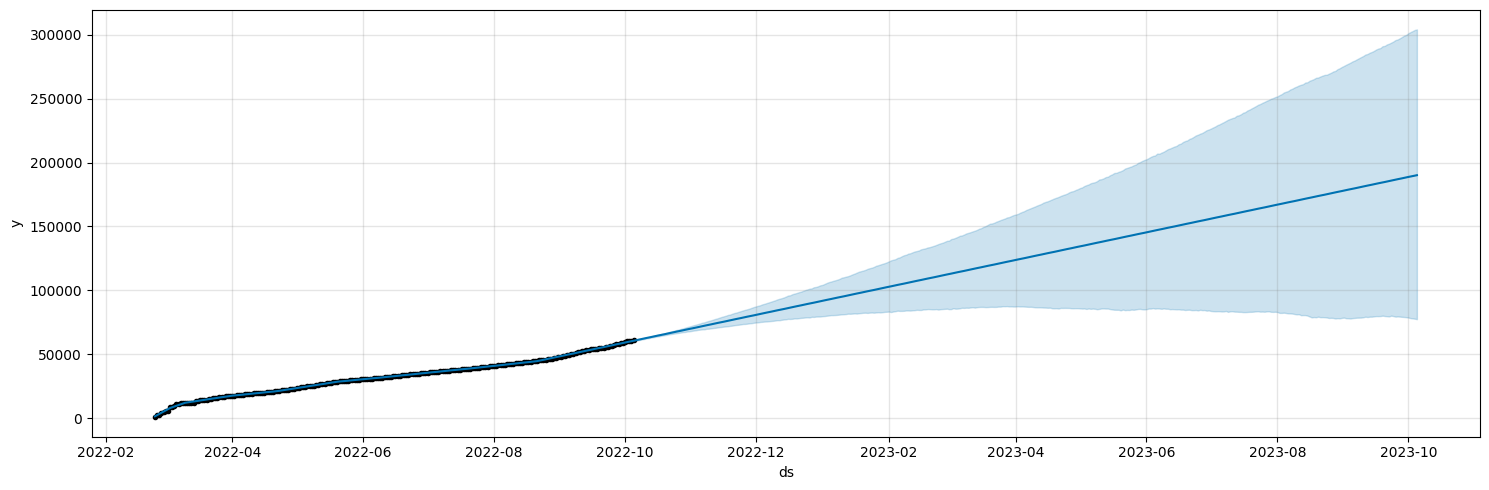

In [200]:
fig1 = m.plot(personnel_loses_forecast, figsize=(15,5))

In [202]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=personnel_loses_forecast['ds'],
    y=personnel_loses_forecast['yhat'],
    line = {'color': '#66ccff', 'width': 3},
    name="Prediction"
))

fig.add_trace(go.Scatter(
    x=personnel_loses_forecast['ds'],
    y=personnel_loses_forecast['yhat_lower'],
    name="Lower Bound"
))

fig.add_trace(go.Scatter(
    x=personnel_loses_forecast['ds'],
    y=personnel_loses_forecast['yhat_upper'],
    name="Upper Bound"
))

fig.add_trace(
    go.Scatter(
        x=personnel_loses_forecast["ds"],
        y=df_subset["personnel"], 
        mode='markers',
        marker={
            "color": "#7c4fef",
            "size": 4,
            "line": {"color": "#000000", "width": 0.75},
        },
        name="Historic Data"
    )
)

fig.update_layout(
    title='1 Year Russian Personnel Losses Prediction<br><br><sup>Based on the public data from the <a =href="https://www.mil.gov.ua/en/">Ministry of Defense of Ukraine</a>. Historic data from 2022-02-24 to 2022-10-05</sup>',
    xaxis_title='Date',
    yaxis_title='Personnel Losses'
)
fig.show()